In [1]:
import numpy as np
from qiskit import *
from POVMMeasure import *
from qiskit.visualization import plot_histogram
from SequentialPOVMMeasurement import SequentialPOVMMeasurement

U = [[1. 0.]
 [0. 1.]]
v[0]=[[ 0.81649658 -0.57735027]
 [ 0.57735027  0.81649658]]
v[1]=[[ 0.81649658 -0.57735027]
 [ 0.57735027  0.81649658]]
U = [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
v[0]=[[ 0. -1.]
 [ 1.  0.]]
v[1]=[[ 1. -0.]
 [ 0.  1.]]
U = [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
v[0]=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
v[1]=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
U = [[-0.70710678+0.j          0.        +0.70710678j]
 [ 0.        -0.70710678j  0.70710678+0.j        ]]
v[0]=[[ 0. -1.]
 [ 1.  0.]]
v[1]=[[ 1. -0.]
 [ 0.  1.]]
U = [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
v[0]=[[ 0. -1.]
 [ 1.  0.]]
v[1]=[[ 1. -0.]
 [ 0.  1.]]


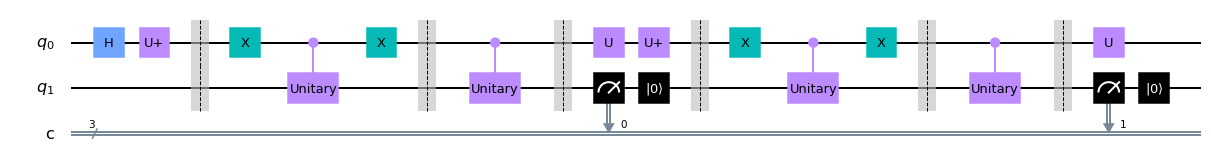

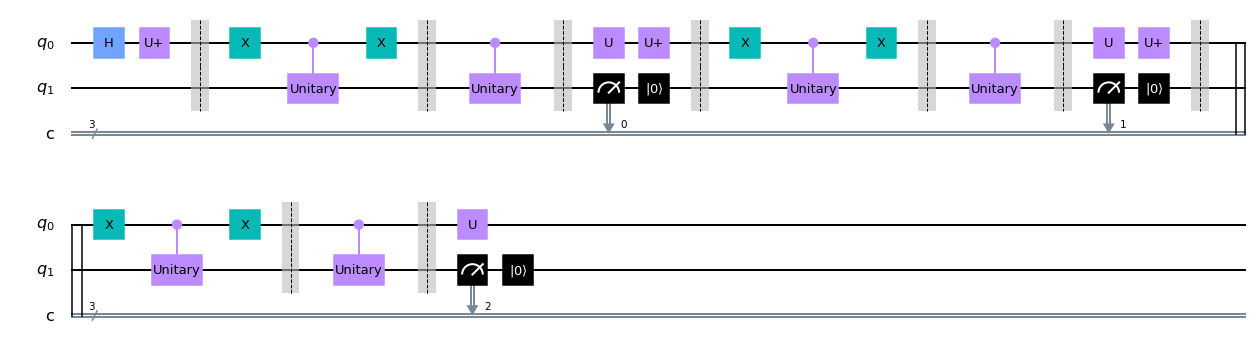

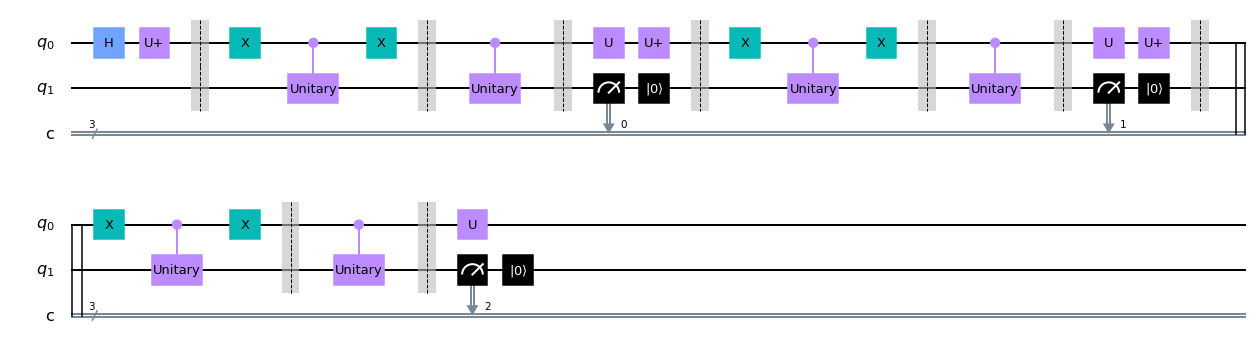

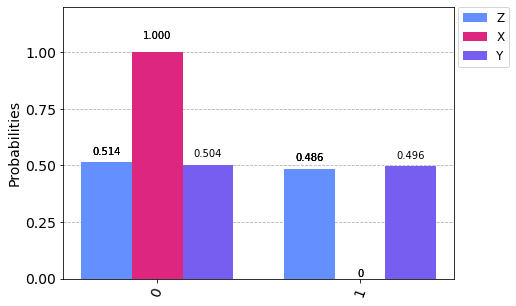

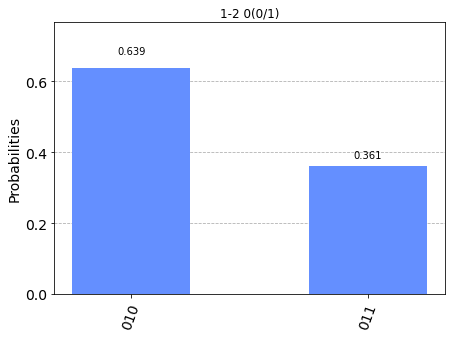

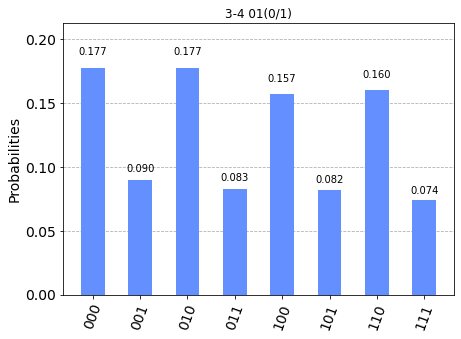

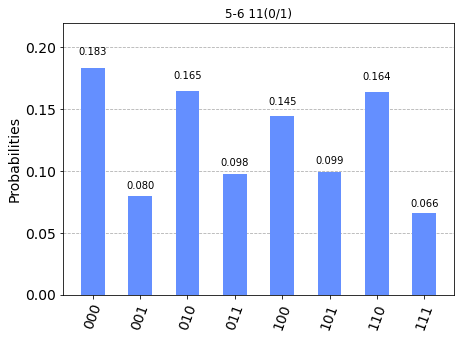

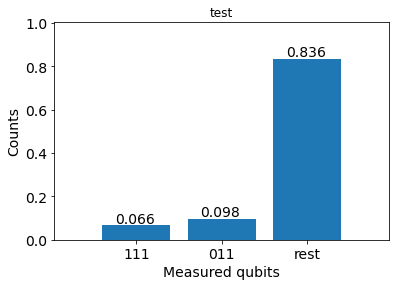

In [4]:
from utilities import plot_povm_histogram
povm_effects = [
    np.array([[1/6, 1/6],
              [1/6, 1/6]]),
    np.array([[1/6, -1/6],
              [-1/6, 1/6]]),
    np.array([[1/6, 0+(-1j/6)],
              [0+(1j/6), 1/6]]),
    np.array([[1/6, 0+(1j/6)],
              [0+(-1j/6), 1/6]]),
    np.array([[1/3, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1/3]])
]

seq = SequentialPOVMMeasurement(povm_effects, [1, 2, 3, 4, 5, 6])
state = QuantumCircuit(1, 1)
state.h(0)
circuits = seq.make_circuits([[1, 2], [[3, 4], [5, 6]]], state)
circuits[0][0].draw('mpl')
circuits[1][0].draw('mpl')
circuits[2][0].draw('mpl')

test_circuit = QuantumCircuit(1,1)
test_circuit.h(0)

z_measure = QuantumCircuit(1,1)
z_measure.measure(0,0)
z_measure = test_circuit + z_measure

y_measure = QuantumCircuit(1,1)
y_measure.sdg(0)
y_measure.h(0)
y_measure.measure(0,0)

y_measure = test_circuit + y_measure

x_measure = QuantumCircuit(1,1)
x_measure.h(0)
x_measure.measure(0,0)

x_measure = test_circuit + x_measure

qasm = qiskit.Aer.get_backend("qasm_simulator")
job_z = qiskit.execute(z_measure, qasm, shots=1000)
job_x = qiskit.execute(x_measure, qasm, shots=1000)
job_y = qiskit.execute(y_measure, qasm, shots=1000)
job_1 = qiskit.execute(circuits[0][0], qasm, shots=1000)
job_2 = qiskit.execute(circuits[1][0], qasm, shots=1000)
job_3 = qiskit.execute(circuits[2][0], qasm, shots=1000)

legend1 = ["Z", "X", "Y"]
plot_histogram([job_z.result().get_counts(), job_x.result().get_counts(), job_y.result().get_counts()], legend=legend1)
plot_histogram(job_1.result().get_counts(), title=circuits[0][1])
plot_histogram(job_2.result().get_counts(), title=circuits[1][1])
plot_histogram(job_3.result().get_counts(), title=circuits[2][1])
plot_povm_histogram(job_3.result().get_counts(), title="test")



U = [[1. 0.]
 [0. 1.]]
v[0]=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
v[1]=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
U = [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
v[0]=[[ 0. -1.]
 [ 1.  0.]]
v[1]=[[ 1. -0.]
 [ 0.  1.]]
{'10': 510, '11': 490}


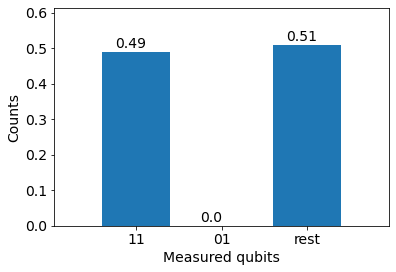

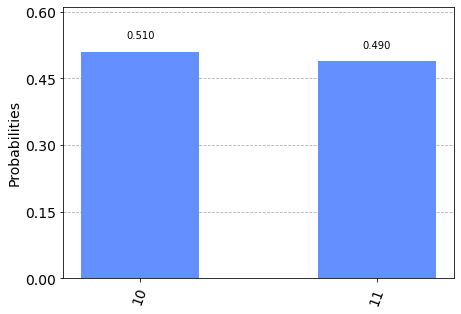

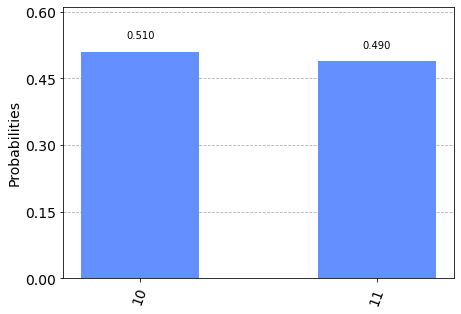

In [3]:
from utilities import measurement_change, luder_measurement, plot_povm_histogram

povm_basic = [
    np.array([[1/2, 1/2],
              [1/2, 1/2]]),
    np.array([[1/2, -1/2],
              [-1/2, 1/2]]),
    np.array([[1/2, 0+(-1j/2)],
              [0+(1j/2), 1/2]]),
    np.array([[1/2, 0+(1j/2)],
              [0+(-1j/2), 1/2]]),
    np.array([[1, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1]])
]

effects = [0, 1, 4, 5]
n = len(effects)

povm_effects = [2 * povm_basic[j] / n for j in effects]

state = QuantumCircuit(2, 2)
state.h(0)

b1 = povm_effects[0] + povm_effects[1]
b2 = povm_effects[2] + povm_effects[3]
a1 = measurement_change(b1, povm_effects[0])
a2 = measurement_change(b1, povm_effects[1])
a3 = measurement_change(b2, povm_effects[2])
a4 = measurement_change(b2, povm_effects[3])
# print(f"B1 = {b1}")
# print(f"B2 = {b2}")
# print(f"A1 = {a1}")
# print(f"A2 = {a2}")
# print(f"A3 = {a3}")
# print(f"A4 = {a4}")

testing_luder = state.compose(luder_measurement(b1, 1, 2, measuring_clbit=0, measure=True), qubits=[0, 1])
testing_luder = testing_luder.compose(luder_measurement(a1, 1, 2, measuring_clbit=1, measure=True), qubits=[0, 1])

job_1 = qiskit.execute(testing_luder, qasm, shots=1000)
print(job_1.result().get_counts())

plot_povm_histogram(job_1.result().get_counts())
plot_histogram(job_1.result().get_counts())
# testing_luder.draw(output="mpl")